## Supervised Learning : Population line, estimator, overfitting
---

Let's explore a learning exercise for a very simple case. Assume that there exist two variables $\bf{x}$ and $\bf{y}$. $\bf{x}$ is a **predictor** variable and $\bf{y}$ is a **response** variable. They are related by the very simple equation $$y = 10x+3 $$





---

In [2]:
# import libraries

import matplotlib
import IPython
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import pylab
import seaborn as sns
import sklearn as sk

%matplotlib inline

---
Now, as data scientists we dont know this relationship between y and x. Rather we have collected observations of y. These observations are bound to have some error - introduced by measurement, by the environment and so forth. This error is also called *noise*. Our goal is to be able to learn the relationship between x and y from an experiment in which we have collected a sample of some 200 (x,y) observations and ignore the noise in this collected data.


---

In [3]:
# Ignore for now!

x = np.array(np.linspace(0,10,400))
y = 10*x+3
y_obs = y+.3*np.random.random_integers(-100,101,size=x.size) #introducing noise - an artifact of experimentation
# Resize the numpy arrays - ignore for now
x.resize((x.size,1))
y_obs.resize((y_obs.size,1))
y.resize((y.size,1))


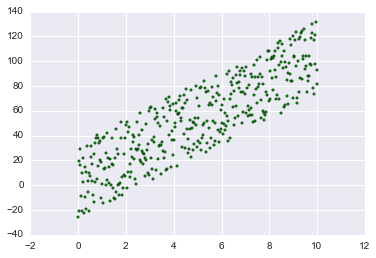

In [4]:

# Plot the data we have sampled.
plt.scatter(x,y_obs,c="g",s=6)

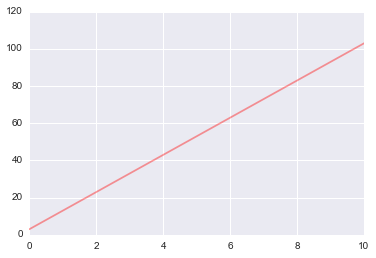

In [5]:
# Plot the true relationship between x and y we are trying to guess
plt.plot(x,y,color="red",alpha=0.4)

---

##Goal : Make a model that can predict unknown y value for given x value with a good deal of accuracy.

We have some reason to believe that the relationship is linear - this may be based on domain knowledge or guessing. A linear relationship is a good first guess. 



We have assumed that $\bf{y=f(x)}$. Using various methods, we must make a *reasonably close* estimate of $f$. This is called an *estimator*, $\hat{f}$

**Estimator = model = ** estimate of $f$ true relationship between $X$ (input) and $y$ (output) = $\hat{f}$

$$\hat{y} = \hat{f}(x)$$ where  $\hat{y}$ is predicted value of y. The more data that $\hat{f}$ is estimated from, the better it will be.

---


In [8]:
# Lets make a model using the first 100 data points!

#Pick any random 100 points
ctr = np.random.randint(0,400,100)
x_train1 = x[ctr]
y_train1 = y_obs[ctr]

from sklearn.linear_model import LinearRegression
lin_mod = LinearRegression()
lin_mod.fit(x_train1,y_train1)

# See what the learned coefficients are!

print "The model for y = ax+b gives a = %f, b=%f " % (lin_mod.coef_, lin_mod.intercept_)

The model for y = ax+b gives a = 10.430121, b=-1.442058 


### How much data?

Lets see if increasing the amount of data improves the model. We're going to build two more models, now using 200 and 400 data points respectively.

In [9]:


# We have taken  3 samples - 1. a sample of 100 points from (x,y) values 2. a sample of 150 points from observed (x,y)
# 3.  a sample of 200 points from observed (x,y)
# You can safely ignore the syntax if it is your first time reading or you are very unfamiliar wit numpy,python

ctr = np.random.randint(0,200,200)
x_train2 = x[ctr]
y_train2 = y_obs[ctr]

x_train3 = x
y_train3 = y_obs

# Ignore for now !!!

y_1 = lin_mod.predict(x)
lin_mod.fit(x_train2,y_train2)
y_2 = lin_mod.predict(x)
lin_mod.fit(x,y_obs)
y_3 = lin_mod.predict(x)



---
Now, we've learnt 3 models using 100, 150 and 200 samples of (x,y) observations. Let's try to plot our prediction against the actual prediction line.

---

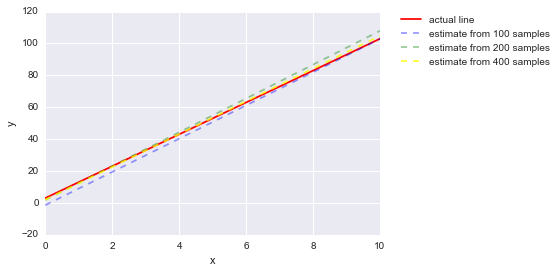

In [10]:
# Plotting the results of the linear model
# based on 100, 150 and 200 samples

real_line = plt.plot(x,y,color="red",label='actual line')
#raw = plt.scatter(x,y_obs,c="g",s=6,label='sampled data')
l1 = plt.plot(x,y_1,'--',c="blue",label='estimate from 100 samples',alpha=0.4)
l2 = plt.plot(x,y_2,'--',c="green",label='estimate from 150 samples',alpha=0.4)
l3 = plt.plot(x,y_3,'--',c="yellow",label='estimate from 200 samples',alpha=0.8)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(labels =['actual line','estimate from 100 samples','estimate from 200 samples','estimate from 400 samples'],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

---
We can see that as the amount of data we take increases, our estimate keeps getting better! This is an important learning -  ** the more data that we have, the better the model performs.**

---

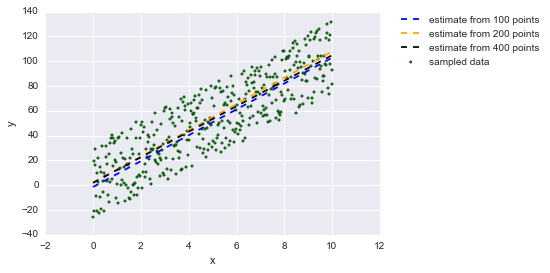

In [11]:
raw = plt.scatter(x,y_obs,c="g",s=6,label='sampled data')
l1 = plt.plot(x,y_1,'--',c="blue",label='estimate from 100 samples')
l2 = plt.plot(x,y_2,'--',c="orange",label='estimate from 150 samples')
l3 = plt.plot(x,y_3,'--',c="black",label='estimate from 200 samples')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(labels =['estimate from 100 points','estimate from 200 points','estimate from 400 points','sampled data'],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


### Which one of the above is a good model for the data?
---

In the case above , we knew what was the real relationship between $x$ and $y$. In a real learning setting, one does not know the true relationship. *How then do we know which of two models built performs better?* Consider the graph above with raw and data and our 3 fitted lines. Which is a better model.The above question is not easy. One idea might be the model that best **fits** the data points, i.e. where the difference in $y$ and $\hat{y}$ (predicted y) is the least. However, this presents some problems.

Consider the next fitting exercise in which we fit a complex 5-degree polynomial and compare it to the simple linear (1-degree fit). 

---

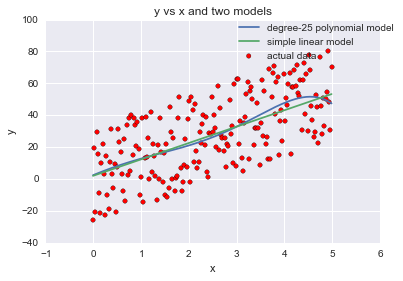

In [12]:
num = 200

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


# make a complicated 25-degree model trained on the first 100 data points
model_crazy =  make_pipeline(PolynomialFeatures(5), Ridge())
model_crazy.fit(x[:num],y_obs[:num])
y_4 = model_crazy.predict(x[:num])


# See how it compares to the simple fit made earlier
plt.scatter(x[:num],y_obs[:num],c='red')
plt.plot(x[:num],y_4)
plt.plot(x[:num],y_3[:num])
plt.title('y vs x and two models')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(labels =['degree-25 polynomial model','simple linear model','actual data'],bbox_to_anchor=(1.05, 1), loc=1, borderaxespad=0.)
plt.savefig('woohoo.png')

--- 


The blue, more complicated model *fits* the data better in the sense of being closer to the data points. If you try and calculate its error vs the simple linear model, you'll find its lower [Optional : Calculate MSE]. Are we done? We know , the green line is much more closer to the true form but it appears that the 5-degree polynomial is better than the actual relationship. 

To be sure, lets use the complicated model to try and predict unseen data. We'll try and see how well the blue model fits  unseen data points.

--- 

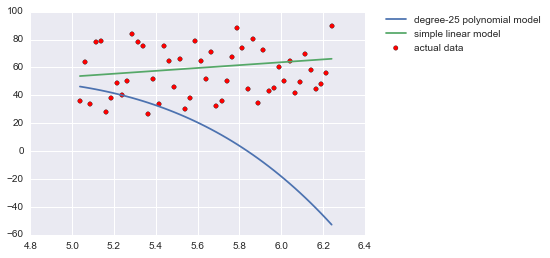

In [13]:
# Test the model on points 201-250, points it hasnt been trained on!
start = 201
stop = 250
y_5 = model_crazy.predict(x[start:stop])
plt.plot(x[start:stop],y_5)
plt.scatter(x[start:stop],y_obs[start:stop],c='r')
plt.plot(x[start:stop],y_3[start:stop])
plt.legend(labels =['degree-25 polynomial model','simple linear model','actual data'],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('not_really.png')

What is happening here! The model fits the seen data better but the green fits the unseen data better!

### Overfitting

This is a classic case of **overfitting**. The model is trying to fit exactly to its training data - the first 100 observations. In doing so, it starts incoporating information specific to the noise in this sample and not the underlying trend or relationship. More flexible models pick up patterns that occur by chance in the data and are not part of the true relationship - **$f$ **.

So when the model tries to predict unseen data, it performs poorly.

### Model Accuracy and the Train-Test-CrossVal paradigm

It isnt sufficient to say that we have low error on some data that we fitted the model with. We must see what error a model gives for unknown data points. The standard practice (in machine learning) is to divide any dataset into a **TRAIN SET** and a **TEST SET**. A model is built using the **train set** and is evaluated on the **test set**. Only when it satisfactorily performs on the **test set** is the model accepted.

                                                END OF EXERCISE 2a

-------

----

Aside: 

**How can we build models that dont overfit?** After all, train-test is just a way to verify that the models we've built are not overfitted. If they are, how do we build better models? There are broadly two ways of doing this.

**1. Regularization** - We penalize a model for its complexity and flexbility when training the model.

**2. Cross Validation** - As part of the training exercise, we keep a set of data points hidden, make a bunch of models, and then choose the one that performs well on hidden data. [need a moderate-large amount of data]

*** We will deal with these concerns in later modules for regularization ***